In [25]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

if '.gitignore' not in os.listdir():
    os.chdir('..')

In [115]:
df = pd.read_csv('data/screenings.csv')
movie_info = pd.read_csv('data/movie_info.csv')
theater_info = pd.read_csv('data/theater_info.csv')

df['weekday'] = pd.DatetimeIndex(df['date']).weekday

df = pd.merge(df, movie_info[['movie', 'title', 'directors', 'duration']], on='movie')
df = pd.merge(df, theater_info[['theater', 'theater_name']], on='theater')

print("{} total days".format(df['date'].nunique()))

days = df.groupby('date')['showtime'].count().reset_index()
days.rename(columns={'showtime':'nb_showtimes'}, inplace=True)
df_without_bad_days = pd.merge(df, days, how='left', on='date')
df_without_bad_days = df_without_bad_days[df_without_bad_days['nb_showtimes']>=50]

print("{} good days".format(df_without_bad_days['date'].nunique()))

SHEET_ID = '1NswVqD697wRNN-pPuEGrxCB4ilnGWSxcRagb33eJjQs'
SHEET_NAME = 'Sheet1'
url = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}'
director_genders = pd.read_csv(url)

df = pd.merge(df, director_genders, on='directors')

365 total days
297 good days


In [60]:
df

,date,showtime,movie,theater,year,weekday,title,directors,theater_name,directors_gender
0,2022-01-01,16.000000,les-400-coups-1959,C0074,1959.0,5,Les 400 coups,François Truffaut,Reflet Medicis,M
1,2022-01-04,13.666667,les-400-coups-1959,C0074,1959.0,1,Les 400 coups,François Truffaut,Reflet Medicis,M
2,2022-01-05,17.500000,les-400-coups-1959,C0074,1959.0,2,Les 400 coups,François Truffaut,Reflet Medicis,M
3,2022-01-01,13.666667,amour-fuite-1979,C0074,1979.0,5,L'Amour en Fuite,François Truffaut,Reflet Medicis,M
4,2022-01-03,13.666667,amour-fuite-1979,C0074,1979.0,0,L'Amour en Fuite,François Truffaut,Reflet Medicis,M
...,...,...,...,...,...,...,...,...,...,...
30951,2022-11-01,12.250000,keeping-vision-alive-women-korean-filmmaking-2001,C6336,2001.0,1,Keeping the Vision Alive : Women in Korean Fi...,Yim Soon-rye,Publicis Cinémas,NaN
30952,2022-03-08,20.000000,dames-encore-femmes-2018,C0012,2018.0,1,Les Dames - Encore Femmes,"Stéphanie Chuat, Véronique Reymond",Les Cinq Caumartin,NaN
30953,2022-12-16,14.000000,l-olivier-2015,C0012,2015.0,4,L'Olivier,Icíar Bollaín,Les Cinq Caumartin,NaN
30954,2022-06-23,19.500000,the-watermelon-woman-1996,C0108,1996.0,3,The Watermelon Woman,Cheryl Dunye,Elysées Lincoln,NaN


## Frequency

In [6]:
directors = df.groupby(['directors'])
directors = pd.DataFrame({
    'nb_screenings':directors['showtime'].count(),
    'nb_movies':directors['movie'].nunique(),
    'nb_dates':directors['date'].nunique(),
    'first_year':directors['year'].min(),
    'last_year':directors['year'].max()
}).reset_index()

In [14]:
directors.sort_values('nb_screenings', ascending=False).head(10)[['directors', 'nb_screenings']]

,directors,nb_screenings
1188,Pier Paolo Pasolini,1139
639,James Cameron,967
825,Kinuyo Tanaka,688
1497,Wong Kar-Wai,642
454,François Truffaut,566
15,Akira Kurosawa,565
666,Jean Eustache,532
324,David Lynch,414
1368,Stanley Kubrick,393
907,Luis Buñuel,370


In [15]:
directors.sort_values('nb_dates', ascending=False).head(10)[['directors', 'nb_dates']]

,directors,nb_dates
1368,Stanley Kubrick,245
1497,Wong Kar-Wai,226
324,David Lynch,211
195,Brian De Palma,186
1188,Pier Paolo Pasolini,179
56,Alfred Hitchcock,132
543,Hayao Miyazaki,129
981,Martin Scorsese,124
438,Francis Ford Coppola,123
907,Luis Buñuel,118


In [16]:
directors.sort_values('nb_movies', ascending=False).head(10)[['directors', 'nb_movies']]

,directors,nb_movies
358,Douglas Sirk,36
574,Howard Hawks,34
15,Akira Kurosawa,30
56,Alfred Hitchcock,29
823,King Vidor,23
688,Jean-Luc Godard,23
625,Jacques Rivette,21
336,Denis Gheerbrant,21
594,Ingmar Bergman,19
1157,Pedro Almodóvar,19


In [53]:
directors.head()

,directors,nb_screenings,nb_movies,nb_dates,first_year,last_year
0,A.J. Edwards,40,1,17,2014.0,2014.0
1,Abbas Kiarostami,6,1,6,1987.0,1987.0
2,Abdellatif Kechiche,2,2,2,2007.0,2016.0
3,Abderrahmane Sissako,1,1,1,1997.0,1997.0
4,"Abdollah Alimorad, Ahmad Arabani, Aviz Mirfakhraï",16,1,14,2010.0,2010.0


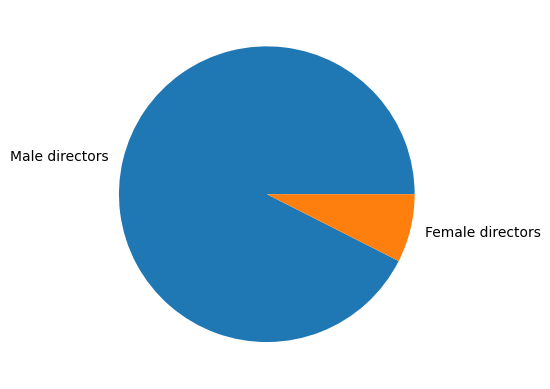

In [86]:
freq = df['directors_gender'].value_counts()
plt.pie(freq, labels=['Male directors', 'Female directors'])
plt.show()

In [95]:
director_films = df.groupby(['directors', 'title', 'year'])
director_films = pd.DataFrame({
    'nb_screenings':director_films['movie'].count(),
    'nb_days':director_films['date'].nunique()
}).reset_index()
director_films.sort_values(['directors', 'nb_screenings'], ascending=[True, False], inplace=True)

In [109]:
director_films[director_films['directors'].str.contains("Scorsese")]

,directors,title,year,nb_screenings,nb_days
2167,Martin Scorsese,Taxi Driver,1976.0,49,49
2162,Martin Scorsese,Les Affranchis,1990.0,17,17
2165,Martin Scorsese,Raging Bull,1980.0,15,15
2157,Martin Scorsese,Casino,1995.0,12,12
2164,Martin Scorsese,"New York, New York",1977.0,11,11
2168,Martin Scorsese,The Last Waltz,1978.0,11,11
2153,Martin Scorsese,After Hours,1985.0,10,10
2163,Martin Scorsese,Les Infiltrés,2006.0,9,9
2152,Martin Scorsese,A tombeau ouvert,1999.0,8,8
2155,Martin Scorsese,Aviator,2004.0,8,8


In [107]:
director_films[director_films['directors'].str.contains("Palma")]

,directors,title,year,nb_screenings,nb_days
408,Brian De Palma,Phantom of the paradise,1974.0,36,34
400,Brian De Palma,Blow Out,1981.0,33,33
409,Brian De Palma,Pulsions,1980.0,30,29
403,Brian De Palma,L'Impasse,1993.0,27,26
406,Brian De Palma,Obsession,1976.0,27,27
412,Brian De Palma,Snake Eyes,1998.0,25,25
402,Brian De Palma,Carrie au bal du diable,1976.0,20,19
411,Brian De Palma,Scarface,1983.0,16,16
401,Brian De Palma,Body Double,1984.0,15,15
404,Brian De Palma,Le Dahlia noir,2006.0,12,12


In [101]:
director_films[director_films['directors'].str.contains("Scola")]

,directors,title,year,nb_screenings,nb_days
895,Ettore Scola,Le Bal,1983.0,104,35
893,Ettore Scola,La Terrasse,1980.0,54,37
900,Ettore Scola,Passion d'amour,1981.0,35,23
891,Ettore Scola,La Famille,1987.0,21,21
898,Ettore Scola,Nous nous sommes tant aimés !,1974.0,21,21
899,Ettore Scola,Parlons femmes,1964.0,3,3
890,Ettore Scola,"Affreux, sales et méchants",1976.0,2,2
894,Ettore Scola,La nuit de Varennes,1982.0,2,2
896,Ettore Scola,Le Dîner,1998.0,2,2
892,Ettore Scola,La Plus belle soirée de ma vie,1972.0,1,1


In [116]:
director_films[director_films['directors'].str.contains("Wong")]

,directors,title,year,nb_screenings,nb_days
3195,Wong Kar-Wai,As Tears Go By - Ainsi vont les larmes,1988.0,193,54
3202,Wong Kar-Wai,Nos années sauvages,1990.0,169,61
3198,Wong Kar-Wai,In the Mood for Love,2000.0,130,114
3197,Wong Kar-Wai,Happy Together,1997.0,61,60
3193,Wong Kar-Wai,2046,2004.0,34,34
3196,Wong Kar-Wai,Chungking Express,1994.0,22,21
3199,Wong Kar-Wai,Les Anges déchus,1995.0,9,9
3200,Wong Kar-Wai,Les Cendres du temps,1994.0,9,9
3201,Wong Kar-Wai,My Blueberry Nights,2007.0,8,8
3203,Wong Kar-Wai,The Grandmaster,2013.0,6,6


In [103]:
director_films[director_films['directors'].str.contains("Godard")]

,directors,title,year,nb_screenings,nb_days
1549,Jean-Luc Godard,Le Mépris,1963.0,43,31
1555,Jean-Luc Godard,Pierrot le Fou,1965.0,43,36
1563,Jean-Luc Godard,À bout de souffle,1960.0,38,31
1542,Jean-Luc Godard,"Alphaville, une étrange aventure de Lemmy Caution",1965.0,28,26
1560,Jean-Luc Godard,Une Femme est une femme,1961.0,26,18
1543,Jean-Luc Godard,Bande à Part,1964.0,25,22
1561,Jean-Luc Godard,Vivre sa vie: Film en douze tableaux,1962.0,24,21
1552,Jean-Luc Godard,Masculin Féminin,1966.0,22,20
1562,Jean-Luc Godard,Week-end,1967.0,18,16
1544,Jean-Luc Godard,Deux ou trois choses que je sais d'elle,1967.0,17,13


In [105]:
director_films[director_films['directors'].str.contains("Cimino")]

,directors,title,year,nb_screenings,nb_days
2238,Michael Cimino,La Porte du paradis,1980.0,50,19
2240,Michael Cimino,Voyage au bout de l'enfer,1978.0,28,28
2236,Michael Cimino,L'Année du dragon,1985.0,12,12
2239,Michael Cimino,Le Canardeur,1974.0,11,11
2237,Michael Cimino,La Maison des otages,1990.0,2,2


## Frequency on "good" days

In [23]:
len(np.unique(df_without_bad_days['date']))

297

In [27]:
director_good_days = df_without_bad_days.groupby('directors')
director_good_days = pd.DataFrame({
    'share_of_good_days': director_good_days['date'].nunique()/len(np.unique(df_without_bad_days['date']))
}).reset_index()
director_good_days = director_good_days.sort_values('share_of_good_days', ascending=False).reset_index(drop=True)

director_good_days.head(20)

,directors,share_of_good_days
0,Stanley Kubrick,0.781145
1,Wong Kar-Wai,0.740741
2,David Lynch,0.690236
3,Brian De Palma,0.616162
4,Pier Paolo Pasolini,0.572391
5,Alfred Hitchcock,0.434343
6,Francis Ford Coppola,0.407407
7,Martin Scorsese,0.400673
8,Luis Buñuel,0.393939
9,Hayao Miyazaki,0.380471


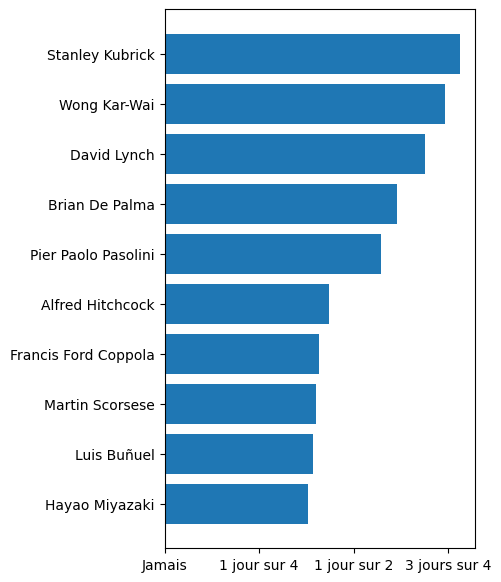

In [44]:
plt.subplots(figsize=(4,7))
temp = director_good_days.copy().head(10)
temp = temp.sort_values('share_of_good_days', ascending=True)
plt.barh(temp['directors'], temp['share_of_good_days'])
plt.xticks([0, 0.25, 0.5, 0.75], labels=['Jamais', '1 jour sur 4', '1 jour sur 2', '3 jours sur 4'])
plt.show()

In [154]:
232/297

0.7811447811447811

In [155]:
129/297

0.43434343434343436

In [143]:
director_days.head(20)

,directors,unique_days
0,Stanley Kubrick,245
1,Wong Kar-Wai,226
2,David Lynch,211
3,Brian De Palma,186
4,Pier Paolo Pasolini,179
5,Alfred Hitchcock,132
6,Hayao Miyazaki,129
7,Martin Scorsese,124
8,Francis Ford Coppola,123
9,Luis Buñuel,118


In [165]:
ranking = df.groupby(['title', 'year', 'directors'])['showtime'].count().reset_index()
ranking = ranking.sort_values('showtime', ascending=False).reset_index(drop=True)
ranking['rank'] = ranking.index+1
ranking['clean_movie'] = ranking['title'] + ", " + ranking['directors'] + " (" + ranking['year'].astype(int).astype(str) + ")"

In [166]:
ranking.head(50)

,title,year,directors,showtime,rank,clean_movie
0,Avatar,2009.0,James Cameron,959,1,"Avatar, James Cameron (2009)"
1,La Maman et la Putain,1972.0,Jean Eustache,532,2,"La Maman et la Putain, Jean Eustache (1972)"
2,Rashômon,1950.0,Akira Kurosawa,420,3,"Rashômon, Akira Kurosawa (1950)"
3,Variety,1983.0,Bette Gordon,313,4,"Variety, Bette Gordon (1983)"
4,Memories,1995.0,"Koji Morimoto, Tensai Okamura, Katsuhiro Ôtomo",264,5,"Memories, Koji Morimoto, Tensai Okamura, Katsu..."
5,Gerry,2002.0,Gus Van Sant,221,6,"Gerry, Gus Van Sant (2002)"
6,Mamma Roma,1962.0,Pier Paolo Pasolini,221,7,"Mamma Roma, Pier Paolo Pasolini (1962)"
7,Un jour sans fin,1993.0,Harold Ramis,219,8,"Un jour sans fin, Harold Ramis (1993)"
8,Neige,1981.0,"Jean-Henri Roger, Juliet Berto",206,9,"Neige, Jean-Henri Roger, Juliet Berto (1981)"
9,Lettre d'une inconnue,1948.0,Max Ophüls,200,10,"Lettre d'une inconnue, Max Ophüls (1948)"


In [167]:
for elem in ranking['clean_movie'].head(20):
    print(elem)

Avatar, James Cameron (2009)
La Maman et la Putain, Jean Eustache (1972)
Rashômon, Akira Kurosawa (1950)
Variety, Bette Gordon (1983)
Memories, Koji Morimoto, Tensai Okamura, Katsuhiro Ôtomo (1995)
Gerry, Gus Van Sant (2002)
Mamma Roma, Pier Paolo Pasolini (1962)
Un jour sans fin, Harold Ramis (1993)
Neige, Jean-Henri Roger, Juliet Berto (1981)
Lettre d'une inconnue, Max Ophüls (1948)
As Tears Go By - Ainsi vont les larmes, Wong Kar-Wai (1988)
Salò ou les 120 journées de Sodome, Pier Paolo Pasolini (1975)
Accattone, Pier Paolo Pasolini (1961)
Les Petites Marguerites, Vera Chytilova (1966)
Nos années sauvages, Wong Kar-Wai (1990)
The Truman Show, Peter Weir (1998)
Infernal affairs, Alan Mak, Andrew Lau (2002)
Lost Highway, David Lynch (1997)
Edward aux mains d'argent, Tim Burton (1990)
Brazil, Terry Gilliam (1985)
